In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [46]:
df = pd.read_csv('ts_data.txt')
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [47]:
df.shape

(204, 2)

In [48]:
df.isnull().sum()

date     0
value    0
dtype: int64

In [49]:
df['date'][-20:]

184    2006-11-01
185    2006-12-01
186    2007-01-01
187    2007-02-01
188    2007-03-01
189    2007-04-01
190    2007-05-01
191    2007-06-01
192    2007-07-01
193    2007-08-01
194    2007-09-01
195    2007-10-01
196    2007-11-01
197    2007-12-01
198    2008-01-01
199    2008-02-01
200    2008-03-01
201    2008-04-01
202    2008-05-01
203    2008-06-01
Name: date, dtype: object

#### Inference
Data is sequentially Indexed with Time

In [50]:
df1 = df.copy()
df2 = df.copy()
df1.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [51]:
df1['Lag1'] = df1['value'].shift(1)
df1['Lag2'] = df1['value'].shift(2)
df1.head()

,date,value,Lag1,Lag2
0,1991-07-01,3.526591,NaN,NaN
1,1991-08-01,3.180891,3.526591,NaN
2,1991-09-01,3.252221,3.180891,3.526591
3,1991-10-01,3.611003,3.252221,3.180891
4,1991-11-01,3.565869,3.611003,3.252221


In [52]:
df1.tail()

,date,value,Lag1,Lag2
199,2008-02-01,21.654285,29.665356,25.806090
200,2008-03-01,18.264945,21.654285,29.665356
201,2008-04-01,23.107677,18.264945,21.654285
202,2008-05-01,22.912510,23.107677,18.264945
203,2008-06-01,19.431740,22.912510,23.107677


In [53]:
df1['Diff1'] = df1['value'] - df1['Lag1']
df1['Diff2'] = df1['value'] - df1['Lag2']
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2
0,1991-07-01,3.526591,NaN,NaN,NaN,NaN
1,1991-08-01,3.180891,3.526591,NaN,-0.345700,NaN
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648


In [54]:
df1['Diff1_M2'] = df1['value'].diff(1)
df1['Diff2_M2'] = df1['value'].diff(2)
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2
0,1991-07-01,3.526591,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-08-01,3.180891,3.526591,NaN,-0.345700,NaN,-0.345700,NaN
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648


In [55]:
df1.dropna(inplace=True)
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466


In [56]:
df1.isnull().sum()

date        0
value       0
Lag1        0
Lag2        0
Diff1       0
Diff2       0
Diff1_M2    0
Diff2_M2    0
dtype: int64

In [57]:
df1['Log'] = np.log(df1['value'])
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370,1.179338
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951


In [58]:
df1['Log_Diff'] = df1['value'] - df1['Log']
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log,Log_Diff
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370,1.179338,2.072883
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986,2.327017
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408,2.294461
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096,2.846275
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951,3.461384


#### Plot Value

In [59]:
df2.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [60]:
df2.set_index('date',inplace=True)
df2.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


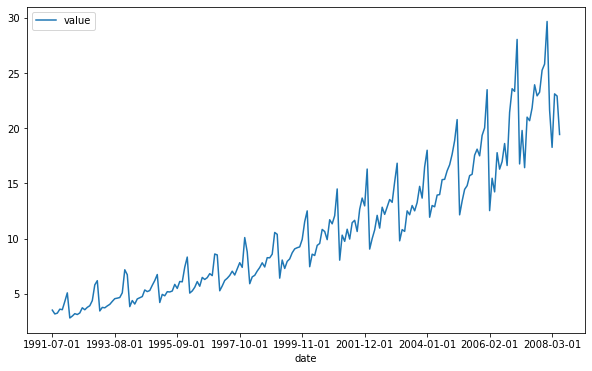

In [61]:
df2.plot(figsize=(10,6))
plt.show()

### Decomposing Time Series Data

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
# decom = seasonal_decompose(df2,model='multiplicative')
# decom.

In [64]:
type(df2)

pandas.core.frame.DataFrame

In [65]:
df3 = pd.read_csv('ts_data.txt',index_col=[0],parse_dates=True)
df3.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [66]:
type(df2.index)

pandas.core.indexes.base.Index

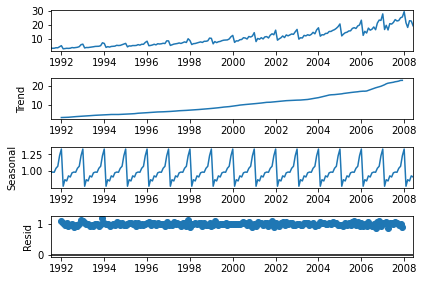

In [67]:
decom = seasonal_decompose(df3, model='multiplicative')
decom.plot()
plt.show()

# original = decom.observed
# trend = decom.trend
# seasonality = decom.seasonal
# residual = decom.resid

# plt.plot(original,label='Original',color='lightblue')
# plt.plot(trend,label='trend',color='orange')
# plt.legend()
# plt.show()

### Checking Stationarity

In [68]:
from statsmodels.tsa.stattools import adfuller

In [69]:
def adf_test(data):
    res = adfuller(data)
    print('ADF-Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]> 0.05:
        print('Ho accepted - Data is non-stationary')
    else:
        print('H1 accepted - Data is stationary')

In [70]:
adf_test(df1['value'])

ADF-Test_Stat 3.229141943117108
p-val 1.0
Ho accepted - Data is non-stationary


### Transformations to make Data Stationary

In [71]:
adf_test(np.log(df2))

ADF-Test_Stat -0.98873348894792
p-val 0.7573512901699126
Ho accepted - Data is non-stationary


In [72]:
adf_test(df1['Diff1'])

ADF-Test_Stat -2.4258020987614857
p-val 0.13458598042526904
Ho accepted - Data is non-stationary


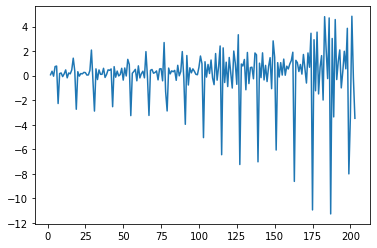

In [73]:
df1['Diff1'].plot()
plt.show()
# Trend has been reduced

In [74]:
adf_test(df1['Diff2'])

ADF-Test_Stat -2.4954628352950228
p-val 0.1165821725024116
Ho accepted - Data is non-stationary


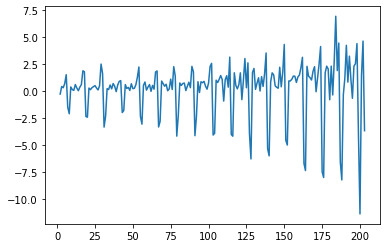

In [75]:
df1['Diff2'].plot()
plt.show()
# Trend has been reduced

In [76]:
adf_test(df1['Log_Diff'])
# time - data
# time = sales
# predictions = final prediction

# time = Sales - log(Sales)

ADF-Test_Stat 3.3778009018790933
p-val 1.0
Ho accepted - Data is non-stationary


In [77]:
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log,Log_Diff
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370,1.179338,2.072883
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986,2.327017
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408,2.294461
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096,2.846275
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951,3.461384


In [78]:
df1['Roll_mean2'] = df1['value'].rolling(window=2).mean()
df1['Roll_std2'] = df1['value'].rolling(window=2).std()
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log,Log_Diff,Roll_mean2,Roll_std2
2,1991-09-01,3.252221,3.180891,3.526591,0.071330,-0.274370,0.071330,-0.274370,1.179338,2.072883,NaN,NaN
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986,2.327017,3.431612,0.253697
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408,2.294461,3.588436,0.031915
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096,2.846275,3.936120,0.523614
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951,3.461384,4.697353,0.552932


In [79]:
# (3.252221 + 3.611003)/2
# 3.4316120000000003

In [80]:
df1.dropna(inplace=True)
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log,Log_Diff,Roll_mean2,Roll_std2
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986,2.327017,3.431612,0.253697
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408,2.294461,3.588436,0.031915
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096,2.846275,3.936120,0.523614
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951,3.461384,4.697353,0.552932
7,1992-02-01,2.814520,5.088335,4.306371,-2.273815,-1.491851,-2.273815,-1.491851,1.034792,1.779728,3.951427,1.607830


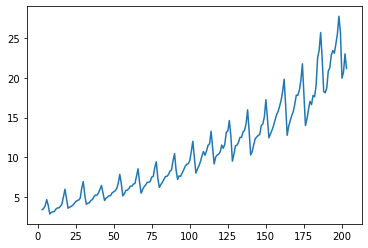

In [81]:
df1['Roll_mean2'].plot()
plt.show()

In [82]:
adf_test(df1['Roll_mean2'])

ADF-Test_Stat 2.536182560871954
p-val 0.9990605968859623
Ho accepted - Data is non-stationary


In [83]:
df1['Roll_mean12'] = df1['value'].rolling(window=12).mean()
df1['Roll_std12'] = df1['value'].rolling(window=12).std()
df1.head()

,date,value,Lag1,Lag2,Diff1,Diff2,Diff1_M2,Diff2_M2,Log,Log_Diff,Roll_mean2,Roll_std2,Roll_mean12,Roll_std12
3,1991-10-01,3.611003,3.252221,3.180891,0.358782,0.430112,0.358782,0.430112,1.283986,2.327017,3.431612,0.253697,NaN,NaN
4,1991-11-01,3.565869,3.611003,3.252221,-0.045134,0.313648,-0.045134,0.313648,1.271408,2.294461,3.588436,0.031915,NaN,NaN
5,1991-12-01,4.306371,3.565869,3.611003,0.740502,0.695368,0.740502,0.695368,1.460096,2.846275,3.936120,0.523614,NaN,NaN
6,1992-01-01,5.088335,4.306371,3.565869,0.781964,1.522466,0.781964,1.522466,1.626951,3.461384,4.697353,0.552932,NaN,NaN
7,1992-02-01,2.814520,5.088335,4.306371,-2.273815,-1.491851,-2.273815,-1.491851,1.034792,1.779728,3.951427,1.607830,NaN,NaN


In [85]:
df11 = df1.copy()
df11.dropna(inplace=True)
df11.isnull().sum()

date           0
value          0
Lag1           0
Lag2           0
Diff1          0
Diff2          0
Diff1_M2       0
Diff2_M2       0
Log            0
Log_Diff       0
Roll_mean2     0
Roll_std2      0
Roll_mean12    0
Roll_std12     0
dtype: int64

In [86]:
adf_test(df11['Roll_mean12'])

ADF-Test_Stat 3.224982172001964
p-val 1.0
Ho accepted - Data is non-stationary


In [ ]:
# ypred = mx + c
# target variable => log(y)
# y = np.exp(model.predict(x))

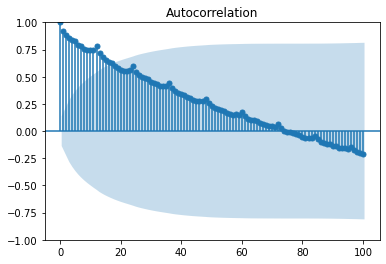

In [88]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df3,lags=100)
plt.show()

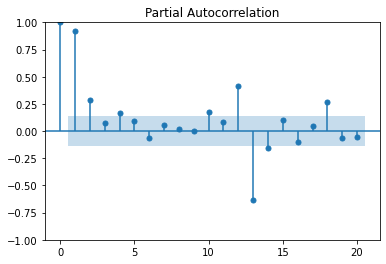

In [90]:
plot_pacf(df3,lags=20)
plt.show()

### ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [93]:
# order = (p,d,q)
m1 = ARIMA(df3,order=(2,1,2)) # p=2,d=1,q=2
ar_m1 = m1.fit()
ar_m1.summary()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -419.002
Date:                Fri, 08 Jul 2022   AIC                            848.004
Time:                        12:17:48   BIC                            864.570
Sample:                    07-01-1991   HQIC                           854.706
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6327      0.102     -6.198      0.000      -0.833      -0.433
ar.L2          0.3640      0.088      4.129      0.000       0.191       0.537
ma.L1          0.1391      0.087      1.596      0.110      -0.032       0.310
ma.L2         -0.8209      0.068    -12.105      0.000      -0.954      -0.688
sigma2         3.6039      0.309     11.659      0.000       2.998       4.210
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               118.86
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               9.47   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

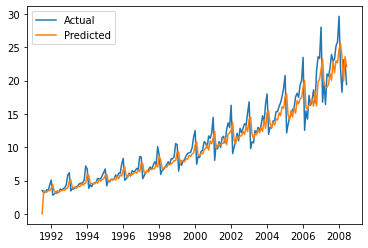

In [96]:
plt.plot(df3,label='Actual')
plt.plot(ar_m1.fittedvalues,label='Predicted')
plt.legend()
plt.show()

In [98]:
df3.tail()

,value
date,
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677
2008-05-01,22.912510
2008-06-01,19.431740


In [99]:
fcast_m1 = ar_m1.forecast(steps=10)
fcast_m1

2008-07-01    21.744589
2008-08-01    21.221250
2008-09-01    22.394165
2008-10-01    21.461554
2008-11-01    22.478537
2008-12-01    21.495630
2009-01-01    22.487684
2009-02-01    21.502245
2009-03-01    22.486828
2009-04-01    21.505194
Freq: MS, Name: predicted_mean, dtype: float64

In [100]:
print('AIC',ar_m1.aic)

AIC 848.0040036438369


#### Model - 2

In [101]:
m2 = ARIMA(df2,order=(6,2,5)) # p=6,d=2,q=5
ar_m2 = m2.fit()
print('AIC',ar_m2.aic)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC 829.7921355958913


### Data Split

In [102]:
df3.shape

(204, 1)

In [104]:
train = df3[:140]
test = df3[140:]
print(train.shape)
print(test.shape)

(140, 1)
(64, 1)


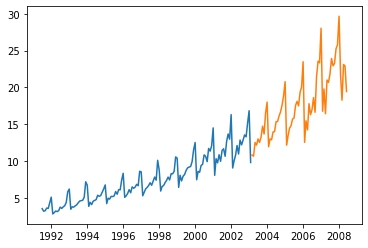

In [105]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.show()

In [106]:
m3 = ARIMA(train,order=(3,2,1))
m3_ar = m3.fit()
print('AIC',m3_ar.aic)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AIC 504.82154471204336


In [107]:
test.head()

,value
date,
2003-03-01,10.816994
2003-04-01,10.654223
2003-05-01,12.512323
2003-06-01,12.161210
2003-07-01,12.998046


In [108]:
fcast_m3 = m3_ar.forecast(steps=64)
fcast_m3

2003-03-01    12.535920
2003-04-01    13.333584
2003-05-01    13.264910
2003-06-01    12.760054
2003-07-01    13.039840
                ...    
2008-02-01    16.803462
2008-03-01    16.871080
2008-04-01    16.938697
2008-05-01    17.006315
2008-06-01    17.073933
Freq: MS, Name: predicted_mean, Length: 64, dtype: float64

In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
def test_metrics(ytest,ypred):
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    print('MSE',mse)
    print('RMSE',rmse)


In [112]:
test_metrics(test,fcast_m3)

MSE 19.83075314643112
RMSE 4.453173379336484


In [30]:
#### AIC
# AIC = -2(log-likelihood) + 2K
# k = number of estimated parameters in the model
# {L} = maximum value of the likelihood function for the model

#### AutoARIMA forecasting

In [81]:
# pip install pmdarima

In [ ]:
# SARIMA (p,d,q)(P,D,Q,period)

In [113]:
import pmdarima as pm

In [117]:
model_autoar = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoar.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=498.149, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=985.425, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=529.939, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=839.890, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=494.550, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=496.501, Time=0.87 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=499.153, Time=1.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=494.693, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=511.008, Time=2.58 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=494.910, Time=1.18 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 8.789 seconds
                               SARIMAX Results                                
Dep. Variable:               

In [120]:
print(test.shape)
test.head()

(64, 1)


,value
date,
2003-03-01,10.816994
2003-04-01,10.654223
2003-05-01,12.512323
2003-06-01,12.161210
2003-07-01,12.998046


In [121]:
prediction = pd.DataFrame(model_autoar.predict(n_periods = 64),index=test.index)
prediction.columns = ['Pred_Sales']
prediction

,Pred_Sales
date,
2003-03-01,11.953890
2003-04-01,12.480310
2003-05-01,12.605164
2003-06-01,12.630925
2003-07-01,12.632233
...,...
2008-02-01,12.271599
2008-03-01,12.265091
2008-04-01,12.258588


#### Custom ARIMA Function

In [122]:
p = list(range(0,5)) # p=0,1,2,3,4
d = list(range(0,4)) # d = 0,1,2,3
q = list(range(0,5)) # q = 0,1,2,3,4
mse_arima = []
rmse_arima = []
aic_arima = []
pdq = []
def custom_arima():
    for i in p:
        for j in d:
            for k in q:
                param = (i,j,k)
                model = ARIMA(train,order=param)
                model_fit = model.fit()
                ypred = model_fit.forecast(steps=64)
                mse = mean_squared_error(test,ypred.values)
                rmse = np.sqrt(mean_squared_error(test,ypred.values))
                mse_arima.append(mse)
                rmse_arima.append(rmse)
                aic_arima.append(model_fit.aic)
                pdq.append((i,j,k))
                print(f'ARIMA at (p,d,q): {i,j,k}')
                print(f'MSE: {round(mse,3)} RMSE: {round(rmse,3)} AIC: {round(model_fit.aic,3)}')
                print('-'*70)
custom_arima()    

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 0, 0)
MSE: 123.956 RMSE: 11.134 AIC: 721.419
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 0, 1)
MSE: 124.448 RMSE: 11.156 AIC: 627.741
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 0, 2)
MSE: 125.054 RMSE: 11.183 AIC: 589.036
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 0, 3)
MSE: 125.567 RMSE: 11.206 AIC: 565.932
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 0, 4)
MSE: 125.073 RMSE: 11.184 AIC: 536.615
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 1, 0)
MSE: 81.807 RMSE: 9.045 AIC: 522.406
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 1, 1)
MSE: 40.541 RMSE: 6.367 AIC: 488.849
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 1, 2)
MSE: 43.638 RMSE: 6.606 AIC: 485.424
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 1, 3)
MSE: 44.077 RMSE: 6.639 AIC: 487.246
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 1, 4)
MSE: 44.303 RMSE: 6.656 AIC: 489.197
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 2, 0)
MSE: 73613.371 RMSE: 271.318 AIC: 645.656
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 2, 1)
MSE: 55.74 RMSE: 7.466 AIC: 526.479
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 2, 2)
MSE: 10.158 RMSE: 3.187 AIC: 477.037
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 2, 3)
MSE: 11.082 RMSE: 3.329 AIC: 472.603
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 2, 4)
MSE: 11.12 RMSE: 3.335 AIC: 474.57
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 3, 0)
MSE: 73362816.188 RMSE: 8565.21 AIC: 792.871
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 3, 1)
MSE: 99988.551 RMSE: 316.21 AIC: 648.863
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 3, 2)
MSE: 938.544 RMSE: 30.636 AIC: 535.45
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (0, 3, 3)
MSE: 10.194 RMSE: 3.193 AIC: 491.369
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (0, 3, 4)
MSE: 17822.588 RMSE: 133.501 AIC: 561.528
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 0, 0)
MSE: 122.77 RMSE: 11.08 AIC: 522.563
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 0, 1)
MSE: 47.908 RMSE: 6.922 AIC: 498.502
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 0, 2)
MSE: 49.486 RMSE: 7.035 AIC: 495.063
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 0, 3)
MSE: 49.991 RMSE: 7.07 AIC: 496.873
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (1, 0, 4)
MSE: 127.042 RMSE: 11.271 AIC: 535.093
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 1, 0)
MSE: 55.424 RMSE: 7.445 AIC: 507.092
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 1, 1)
MSE: 44.2 RMSE: 6.648 AIC: 485.289
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 1, 2)
MSE: 44.106 RMSE: 6.641 AIC: 487.249
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 1, 3)
MSE: 44.187 RMSE: 6.647 AIC: 481.43
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 1, 4)
MSE: 44.329 RMSE: 6.658 AIC: 491.147
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 2, 0)
MSE: 22011.511 RMSE: 148.363 AIC: 592.772
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 2, 1)
MSE: 29.454 RMSE: 5.427 AIC: 511.607
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (1, 2, 2)
MSE: 11.027 RMSE: 3.321 AIC: 472.818
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 2, 3)
MSE: 9.848 RMSE: 3.138 AIC: 478.495
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 2, 4)
MSE: 11.164 RMSE: 3.341 AIC: 468.756
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 3, 0)
MSE: 26477753.109 RMSE: 5145.654 AIC: 704.045
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 3, 1)
MSE: 30112.967 RMSE: 173.531 AIC: 597.305
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 3, 2)
MSE: 108.774 RMSE: 10.429 AIC: 521.717
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (1, 3, 3)
MSE: 677.75 RMSE: 26.034 AIC: 528.939
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

ARIMA at (p,d,q): (1, 3, 4)
MSE: 10.491 RMSE: 3.239 AIC: 495.342
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 0, 0)
MSE: 112.322 RMSE: 10.598 AIC: 512.423
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 0, 1)
MSE: 50.194 RMSE: 7.085 AIC: 494.91
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 0, 2)
MSE: 50.052 RMSE: 7.075 AIC: 496.875
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 0, 3)
MSE: 50.039 RMSE: 7.074 AIC: 491.055
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (2, 0, 4)
MSE: 46.655 RMSE: 6.83 AIC: 488.298
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 1, 0)
MSE: 46.756 RMSE: 6.838 AIC: 501.002
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 1, 1)
MSE: 44.077 RMSE: 6.639 AIC: 487.238
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (2, 1, 2)
MSE: 26.486 RMSE: 5.146 AIC: 471.242
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 1, 3)
MSE: 41.638 RMSE: 6.453 AIC: 470.177
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (2, 1, 4)
MSE: 46.526 RMSE: 6.821 AIC: 474.493
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 2, 0)
MSE: 6672.072 RMSE: 81.683 AIC: 566.141
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 2, 1)
MSE: 21.772 RMSE: 4.666 AIC: 505.594
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

ARIMA at (p,d,q): (2, 2, 2)
MSE: 11.168 RMSE: 3.342 AIC: 474.442
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 2, 3)
MSE: 10.737 RMSE: 3.277 AIC: 471.23
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (2, 2, 4)
MSE: 11.364 RMSE: 3.371 AIC: 466.921
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 3, 0)
MSE: 8239495.045 RMSE: 2870.452 AIC: 655.6
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (2, 3, 1)
MSE: 9230.059 RMSE: 96.073 AIC: 571.652
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

ARIMA at (p,d,q): (2, 3, 2)
MSE: 31.91 RMSE: 5.649 AIC: 516.359
----------------------------------------------------------------------
ARIMA at (p,d,q): (2, 3, 3)
MSE: 126.877 RMSE: 11.264 AIC: 521.473
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

ARIMA at (p,d,q): (2, 3, 4)
MSE: 459.401 RMSE: 21.434 AIC: 526.179
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 0, 0)
MSE: 96.474 RMSE: 9.822 AIC: 508.377
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 0, 1)
MSE: 49.911 RMSE: 7.065 AIC: 496.866
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

ARIMA at (p,d,q): (3, 0, 2)
MSE: 50.274 RMSE: 7.09 AIC: 493.092
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 0, 3)
MSE: 46.477 RMSE: 6.817 AIC: 479.914
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 0, 4)
MSE: 51.67 RMSE: 7.188 AIC: 484.999
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 1, 0)
MSE: 44.508 RMSE: 6.671 AIC: 500.286
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 1, 1)
MSE: 43.985 RMSE: 6.632 AIC: 489.069
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

ARIMA at (p,d,q): (3, 1, 2)
MSE: 39.319 RMSE: 6.27 AIC: 463.313
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 1, 3)
MSE: 45.033 RMSE: 6.711 AIC: 478.14
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

ARIMA at (p,d,q): (3, 1, 4)
MSE: 44.161 RMSE: 6.645 AIC: 473.804
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 2, 0)
MSE: 3088.344 RMSE: 55.573 AIC: 555.581
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 2, 1)
MSE: 19.831 RMSE: 4.453 AIC: 504.822
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 2, 2)
MSE: 20.104 RMSE: 4.484 AIC: 499.736
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (3, 2, 3)
MSE: 29.095 RMSE: 5.394 AIC: 499.559
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 2, 4)
MSE: 10.953 RMSE: 3.31 AIC: 470.465
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 3, 0)
MSE: 3381315.448 RMSE: 1838.835 AIC: 629.114
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 3, 1)
MSE: 4309.014 RMSE: 65.643 AIC: 561.725
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 3, 2)
MSE: 6862.185 RMSE: 82.838 AIC: 560.98
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (3, 3, 3)
MSE: 26801.191 RMSE: 163.711 AIC: 572.05
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (3, 3, 4)
MSE: 63.069 RMSE: 7.942 AIC: 521.765
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (4, 0, 0)
MSE: 85.859 RMSE: 9.266 AIC: 508.391
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (4, 0, 1)
MSE: 49.745 RMSE: 7.053 AIC: 498.704
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (4, 0, 2)
MSE: 49.33 RMSE: 7.024 AIC: 494.038
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (4, 0, 3)
MSE: 50.169 RMSE: 7.083 AIC: 490.278
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (4, 0, 4)
MSE: 49.656 RMSE: 7.047 AIC: 486.585
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (4, 1, 0)
MSE: 42.697 RMSE: 6.534 AIC: 498.404
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (4, 1, 1)
MSE: 43.736 RMSE: 6.613 AIC: 489.577
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (4, 1, 2)
MSE: 39.184 RMSE: 6.26 AIC: 461.563
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (4, 1, 3)
MSE: 43.532 RMSE: 6.598 AIC: 471.232
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (4, 1, 4)
MSE: 40.523 RMSE: 6.366 AIC: 451.786
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (4, 2, 0)
MSE: 1603.069 RMSE: 40.038 AIC: 549.657
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (4, 2, 1)
MSE: 18.234 RMSE: 4.27 AIC: 502.715
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (4, 2, 2)
MSE: 19.575 RMSE: 4.424 AIC: 501.428
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (4, 2, 3)
MSE: 20.176 RMSE: 4.492 AIC: 497.343
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (4, 2, 4)
MSE: 10.246 RMSE: 3.201 AIC: 464.217
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (4, 3, 0)
MSE: 1847507.855 RMSE: 1359.231 AIC: 618.624
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (4, 3, 1)
MSE: 2283.346 RMSE: 47.784 AIC: 556.301
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (4, 3, 2)
MSE: 12.959 RMSE: 3.6 AIC: 514.181
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA at (p,d,q): (4, 3, 3)
MSE: 10571.898 RMSE: 102.82 AIC: 558.824
----------------------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA at (p,d,q): (4, 3, 4)
MSE: 22.876 RMSE: 4.783 AIC: 508.309
----------------------------------------------------------------------


In [124]:
print(min(mse_arima),mse_arima.index(min(mse_arima)))
print(min(rmse_arima),rmse_arima.index(min(rmse_arima)))
print(min(aic_arima),aic_arima.index(min(aic_arima)))
print(pdq[33],pdq[89])

9.848490965793488 33
3.1382305469473537 33
451.7858757571792 89
(1, 2, 3) (4, 1, 4)
